In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
# Input data files are available in the "./input/" directory.


<a id="7"></a> <br>
# UNSUPERVISED LEARNING

Unsupervised learning uses unlabeled data, and uncover hidden patterns from unlabeled data. 

Example - there are orthopedic patients data that do not have labels. You do not know which orthopedic patient entry is *normal* or *abnormal*.

In our previous example with orthopedic patients data is labeled (supervised) - it has *target* variable. 

In order to work on **unsupervised learning**, lets drop target variable. Note that for visualization we will just consider *pelvic_radius* and *degree_spondylolisthesis* features (variables).

Contents of this part of the excercise:<br>

1. [Clustering](#8)
    1. [K-Means Clustering](#8)
    1. [Clustering Evaluation](#9)
    1. [TODO No.1: Standardization](#10)    
1. [Dimensionality reduction](#11)
    1. [Principal Component Analysis (PCA)](#11)
    1. [TODO No.2: Use PCA for feature pre-selection](#12)
    1. [TODO No.3: Compare correlation matrix of the data and of the PCA components](#13)
    1. [T - Distributed Stochastic Neighbor Embedding (T - SNE)](#14)
    1. [TODO No.4: Use  t-SNE for feature pre-selection](#15)
    1. [TODO No.5: Tune hyperparameters for t-SNE](#16)
  

https://scikit-learn.org/stable/unsupervised_learning.html


<a id="8"></a> <br>
## 1. Clustering

### 1.1 K-Means Clustering
* Lets try our first unsupervised method - K-Means Clustering
* K-Means Clustering: The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on the feature similarity.
* KMeans(n_clusters = 2): n_clusters = 2 - means that it will create 2 clusters

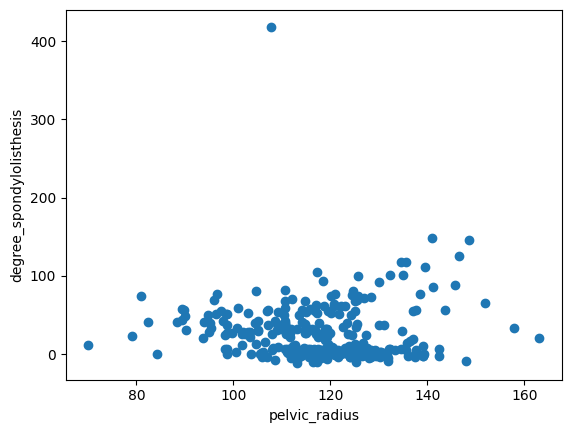

In [25]:
# Lets visualise our data (no labels)
data = pd.read_csv('./input/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.savefig('Scatter_matrix_UnL.png')
plt.show()

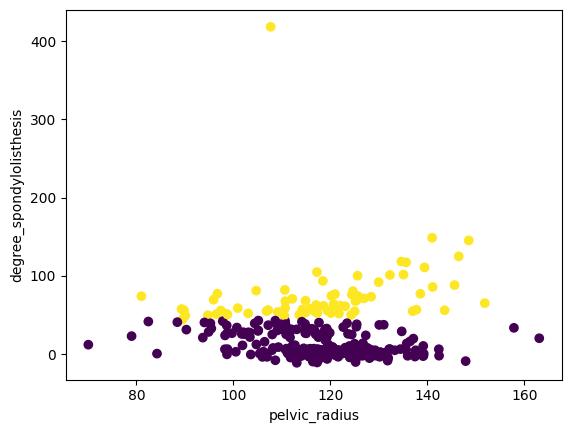

In [26]:
# KMeans Clustering (unsupervised assigning of labels without prior knowledge)
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.savefig('Scatter_matrix_KMeans.png')
plt.show()

<a id="9"></a> <br>
### 1.2 Clustering Evaluation
We cluster data in two groups. Is that correct clustering? In order to evaluate clustering we will use cross tabulation.
* There are two clusters that are *0* and *1* 
* First class *0* includes 138 abnormal and 100 normal patients
* Second class *1* includes 72 abnormal and 0 normal patiens
*The majority of two clusters are abnormal patients.

In [27]:
# cross tabulation table
df = pd.DataFrame({'labels':labels,'class':data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


The new question is what if number of classes is unknow. This is similar to hyperparameter in KNN or regressions. 
* Inertia: how spread out the clusters are; distance from each sample
    * Lower inertia means more clusters
* What is the best number of clusters?
    * There is a trade off between low inertia and not too many clusters 

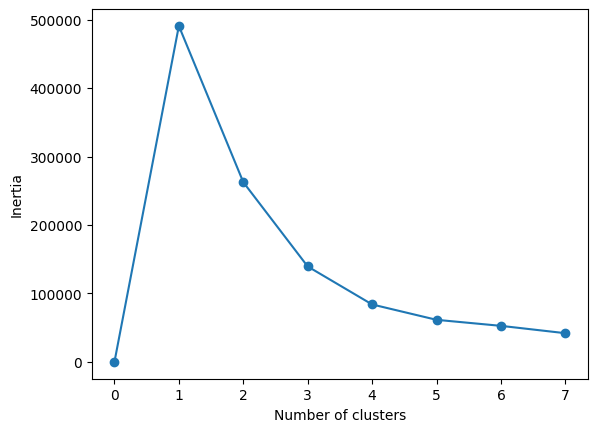

In [28]:
# Inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<a id="10"></a> <br>
### TODO No. 1: Standardization

Standardizaton is important for both supervised and unsupervised learning.

* Apply KMeans for clustering
* Use all features for clustering (except 'class' feature of course)
* Standardize (scale) your data
* Use Pipeline method
* Print cross tabulation table

In [29]:
data = pd.read_csv('./input/column_2C_weka.csv')
data3 = data.drop('class',axis = 1)

In [30]:
## TODO No.1!!!

# Apply KMeans, scale and pipeline 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('./input/column_2C_weka.csv')
data3 = data.drop('class', axis=1)

# Create a pipeline with StandardScaler and KMeans
pipeline = Pipeline([
	('scaler', StandardScaler()),
	('kmeans', KMeans(n_clusters=2))
])

# Fit the pipeline to the data
pipeline.fit(data3)

# Predict the cluster labels
labels = pipeline.predict(data3)

# Create a cross tabulation table
df = pd.DataFrame({'labels': labels, 'class': data['class']})
ct = pd.crosstab(df['labels'], df['class'])
print(ct)


class   Abnormal  Normal
labels                  
0             94      90
1            116      10


<a id="11"></a> <br>
## 2. Dimensionality reduction

### 2.1 PRINCIPAL COMPONENT ANALYSIS (PCA)
* Fundemental dimension reduction technique
* First step is decorrelation:
    * rotates data samples to be aligned with axes
    * shifts data asmples so they have zero mean
    * no information lost
    * fit(): learn how to shift samples
    * transform(): apply the learned transformation. It can also be applied to test data
* Resulting PCA features are not lineary correlated
* Principle components: directions of variance

In [31]:
# PCA
from sklearn.decomposition import PCA
data3 = data.drop('class',axis = 1)

model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',transformed)

Principle components:  [[-2.52182043e+01  1.32016248e+01 -1.58879017e+01  1.40931945e+01
  -1.90442110e+00  1.67840346e-10]
 [-3.75499241e+01 -1.89578049e+01 -1.18435184e+01  2.12270429e+00
  -2.32235286e+00 -6.70553831e-11]
 [-2.19489374e+01  2.30684027e+01 -6.32335890e+00  8.94423617e+00
   2.51605740e+00  2.85719041e-11]
 ...
 [-2.70106810e+01  7.80157543e+00  9.06343330e+00  7.39173891e+00
   7.23834348e+00 -1.01087561e-11]
 [-3.29548288e+01 -3.68688373e+00 -2.23491798e+00 -5.67619091e+00
  -1.57653302e+00  3.17807951e-09]
 [-4.07173478e+01 -1.65992910e+01  6.17614641e-01 -8.95969034e+00
  -5.02178278e+00  2.08145766e-10]]


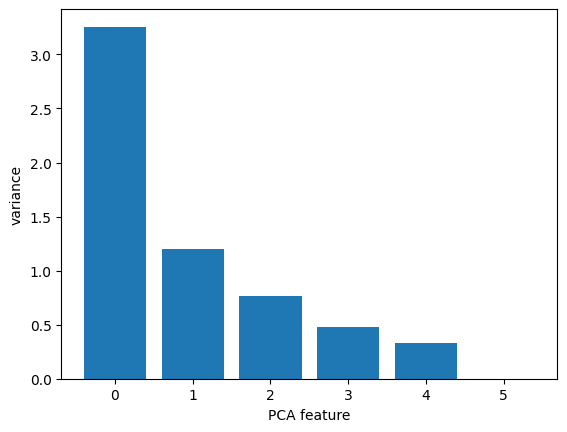

In [18]:
# PCA variance
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()


* Second step: intrinsic dimension: number of feature needed to approximate the data essential idea behind dimension reduction
* PCA identifies intrinsic dimension when samples have any number of features
* intrinsic dimension = number of PCA feature with significant variance
* In order to choose intrinsic dimension try all of them and find best accuracy
* Also check intuitive way of PCA with this example: https://www.kaggle.com/kanncaa1/tutorial-pca-intuition-and-image-completion

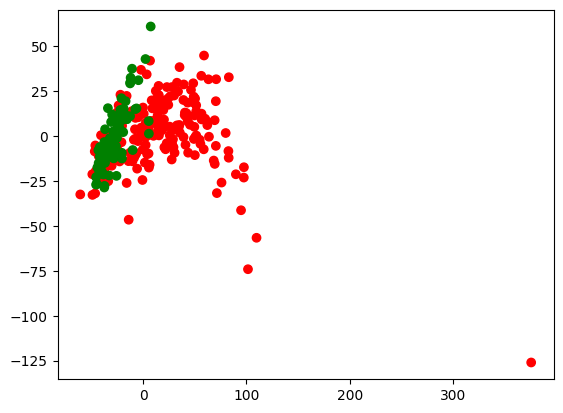

In [19]:
# apply PCA
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()

<a id="12"></a> <br>
### TODO No. 2: Use PCA for feature pre-selection

* Use first two-three PCA components instead of features, and apply KNN, linear regression, logistic regression, SVC, SVR and K-Means and compare results with the previous results.
* Did it improve results?

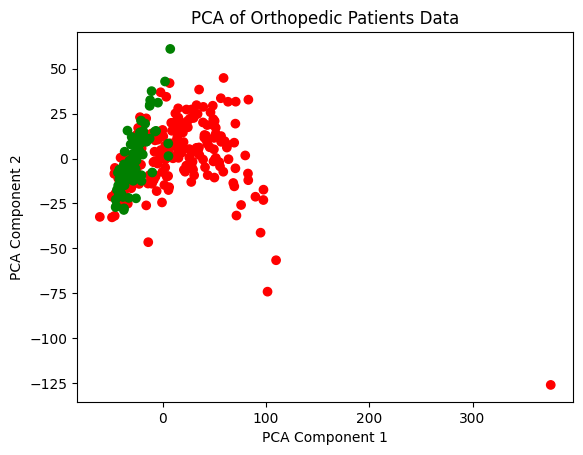

In [34]:
## TODO No.2!!!
# Use all features as input for PCA (except 'class' feature of course)

# PCA implementation
pca = PCA(n_components=2)
pca.fit(data3)
transformed = pca.transform(data3)

# Plotting the PCA components
plt.scatter(transformed[:, 0], transformed[:, 1], c=['red' if i == 'Abnormal' else 'green' for i in data['class']])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Orthopedic Patients Data')
plt.show()


<a id="13"></a> <br>
### TODO No. 3: Compare correlation matrix of the data and of the PCA components

* Keep all PCA components and draw both correlation matrices.
* What is the effect of applying PCA?

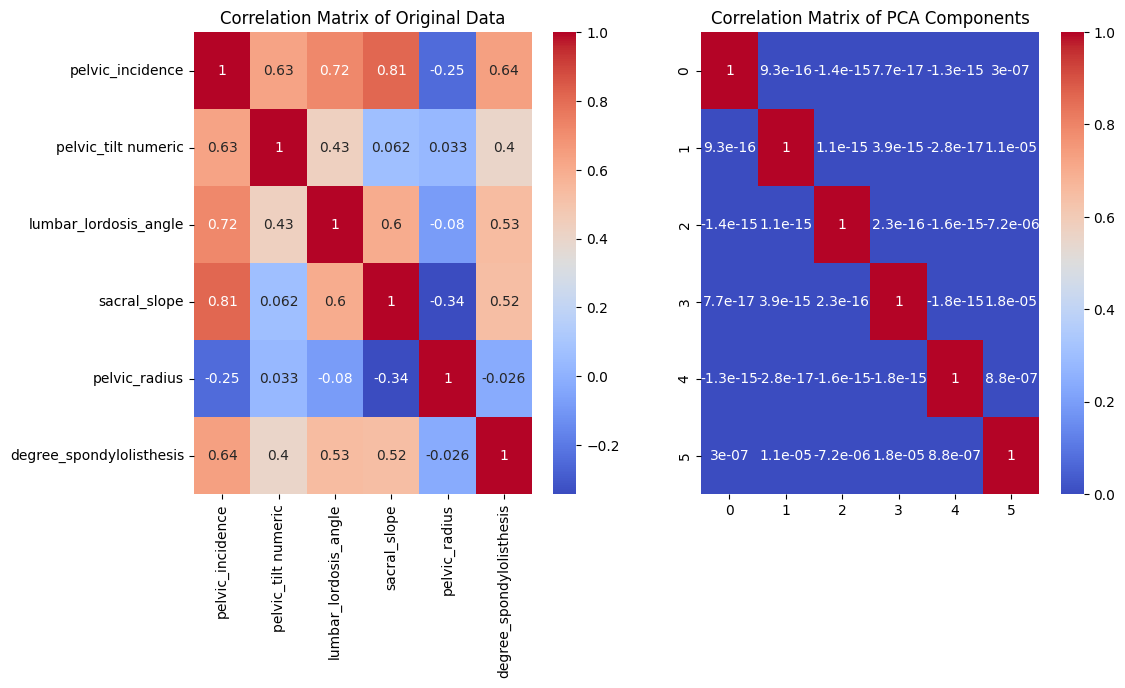

In [ ]:
# TODO No. 3: Compare correlation matrix of the data and of the PCA components

# Compute the correlation matrix of the original data
corr_matrix_original = data3.corr()

# Compute the correlation matrix of the PCA components
pca = PCA()
pca_components = pca.fit_transform(data3)
pca_df = pd.DataFrame(pca_components)
corr_matrix_pca = pca_df.corr()

# Plot the correlation matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(corr_matrix_original, ax=ax[0], cmap='coolwarm', annot=True)
ax[0].set_title('Correlation Matrix of Original Data')

sns.heatmap(corr_matrix_pca, ax=ax[1], cmap='coolwarm', annot=True)
ax[1].set_title('Correlation Matrix of PCA Components')

plt.show()

<a id="14"></a> <br>
### 2.2 T - Distributed Stochastic Neighbor Embedding (t-SNE)
 * learning rate: 50-200 in normal
 * fit_transform: it is both fit and transform. t-sne is the only one to have fit_transform
 * Varieties have same position relative to one another

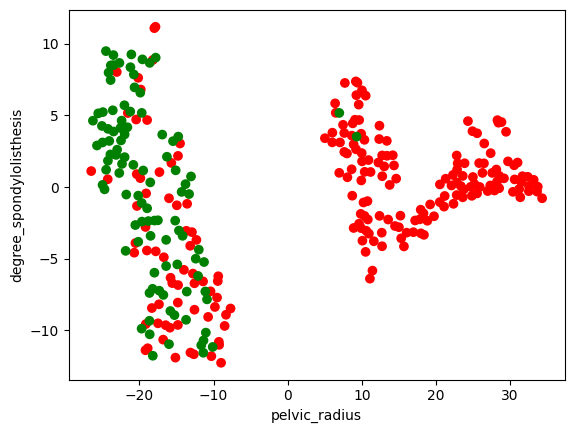

In [22]:
from sklearn.manifold import TSNE
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]

model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

<a id="15"></a> <br>
### TODO No. 4: Investigate using t-SNE for feature pre-selection

* Try to reduce dimension to 2-3 features using t-SNE, and apply KNN, linear regression, logistic regression, SVC, SVR and K-Means and compare results with the previous results.
* Is this possible?
* Can it be compared to PCA?

In [ ]:
## TODO No.4!!!


from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, learning_rate=100)
tsne_features = tsne.fit_transform(data3)

# Apply KNN
knn = KNeighborsClassifier()
knn.fit(tsne_features, data['class'])
knn_predictions = knn.predict(tsne_features)
knn_accuracy = accuracy_score(data['class'], knn_predictions)
print(f'KNN Accuracy: {knn_accuracy}')

# Apply Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(tsne_features, data['class'].apply(lambda x: 1 if x == 'Abnormal' else 0))
linear_reg_predictions = linear_reg.predict(tsne_features)
print(f'Linear Regression Predictions: {linear_reg_predictions}')

# Apply Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(tsne_features, data['class'])
log_reg_predictions = log_reg.predict(tsne_features)
log_reg_accuracy = accuracy_score(data['class'], log_reg_predictions)
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')

# Apply SVC
svc = SVC()
svc.fit(tsne_features, data['class'])
svc_predictions = svc.predict(tsne_features)
svc_accuracy = accuracy_score(data['class'], svc_predictions)
print(f'SVC Accuracy: {svc_accuracy}')

# Apply SVR
svr = SVR()
svr.fit(tsne_features, data['class'].apply(lambda x: 1 if x == 'Abnormal' else 0))
svr_predictions = svr.predict(tsne_features)
print(f'SVR Predictions: {svr_predictions}')

# Apply K-Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(tsne_features)
kmeans_labels = kmeans.predict(tsne_features)
print(f'K-Means Labels: {kmeans_labels}')

KNN Accuracy: 0.9064516129032258
Linear Regression Predictions: [0.5916174  0.34525517 0.6146187  0.6044602  0.41943085 0.32359126
 0.49249855 0.40915528 0.41404653 0.4824249  0.4211102  0.30871466
 0.4441989  0.48304993 0.5465427  0.41089302 0.61014616 0.31792867
 0.3508484  0.39061254 0.38445634 0.51110005 0.6137296  0.405636
 0.3509656  0.47754973 0.29797724 0.4366672  0.36282983 0.597762
 0.50541866 0.48319405 0.38230693 0.37919942 0.53500414 0.33235556
 0.32309112 0.30042863 0.5271824  0.47049266 0.32128355 0.42453372
 0.47252393 0.5756222  0.6204639  0.51443076 0.45152664 0.37495
 0.3663812  0.33404672 0.4780481  0.5641908  0.47721952 0.3367361
 0.37686628 0.4835747  0.41180035 0.43186027 0.36855286 0.43002197
 1.0348427  1.062685   0.72765505 0.8513843  0.7197808  0.8803835
 0.8550792  0.9460244  0.6381226  0.8301551  0.8513972  1.0881813
 1.0346203  0.7700038  1.0249157  1.1134953  1.0892268  0.8898271
 0.8293464  0.74714553 1.0200636  1.0365968  0.9771636  1.045047
 1.003606  

<a id="16"></a> <br>
### TODO No. 5: Tune hyperparameters for t-SNE (OPTIONAL)

* Investigate how to tune learning_rate hyperparameter for t-SNE 
* Demostrate on our example

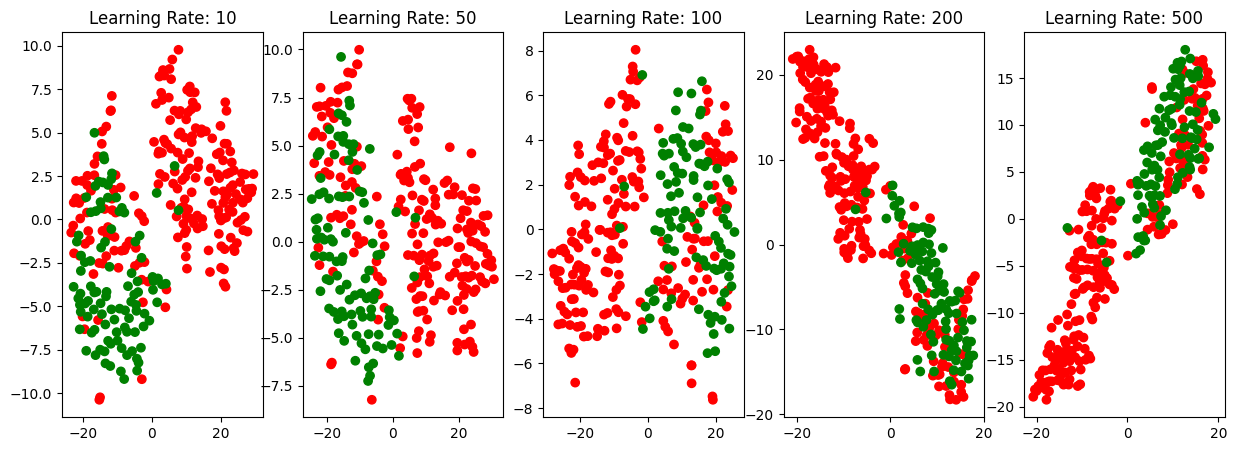

In [ ]:


from sklearn.manifold import TSNE

# Define a range of learning rates to try
learning_rates = [10, 50, 100, 200, 500]

# Plot the results for each learning rate
fig, axes = plt.subplots(1, len(learning_rates), figsize=(15, 5))
for i, lr in enumerate(learning_rates):
	tsne = TSNE(learning_rate=lr)
	tsne_features = tsne.fit_transform(data3)
	axes[i].scatter(tsne_features[:, 0], tsne_features[:, 1], c=['red' if x == 'Abnormal' else 'green' for x in data['class']])
	axes[i].set_title(f'Learning Rate: {lr}')
plt.show()

## Attributions and License:

Some code snippets are based on [https://www.kaggle.com/code/kanncaa1/machine-learning-tutorial-for-beginners/notebook].

This work is licensed under the [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0) open source license.